In [5]:
#라이브러리 임포트 및 함수 정의
import cv2
import matplotlib.pyplot as plt
import numpy as np

#path를 입력받아 imread하고, BGR2RGB로 convert하는 함수
def MyImread(path):
    bgr_img = cv2.imread(path)
    assert bgr_img is not None, "영상 로드 실패"
    
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    return rgb_img

In [6]:
#해리스코너
#영상(RGB)을 입력받아 특징점을 찾고,
#찾은 특징점을 그려 return하는 함수

#blockSize : 이웃 블록의 범위
#spertureSize : 소벨 마스크의 크기
#k : 해리스 코너 수식에서 k의 값(사람이 직접 정해야함. 가장 큰 단점이다.)
#thresh : 최대 반응의 일정 비율까지만 허용함(클수록 조금 검출됨)

def Harris(img, blockSize=2, apertureSize=3, k=0.04, thresh=0.01):
    radian = 3 # 특징점을 표시할 원의 반지름
    color = (255, 0, 0) # 특징을 표시할 색상
    thickness = 2 # 원을 그리는 선의 두께 (-1이면 원 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy()
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    #Harris corner 검출
    corner_response = cv2.cornerHarris(gray_img, blockSize, apertureSize, k)
    
    #정규화(0~1 범위로)
    max_value = np.max(corner_response)
    corner_response /= max_value
    
    #특징점 그리기
    for y in range(h):
        for x in range(w):
            #thresh 이상의 강한 반응만 검출
            if(corner_response[y,x] > thresh):
                cv2.circle(result_img, (x,y), radian, color, 2)
    return result_img

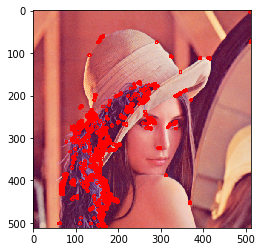

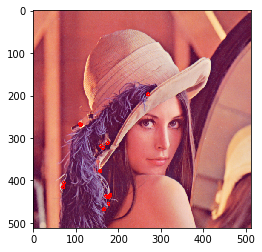

In [5]:
lena = MyImread("./lena.png")

lena_harris1 = Harris(lena, thresh = 0.01)
lena_harris2 = Harris(lena, thresh = 0.2)

plt.figure()
plt.imshow(lena_harris1)
plt.figure()
plt.imshow(lena_harris2)

In [6]:
#SIFT

#영상(RGB)을 입력받아 특징점을 찾고,
#찾은 특징점을 그려 return하는 함수

#nfeatures : 점수가 높은 n개의 특징점을 리턴(-1이면 찾은 모든 특징점을 리턴)
#nOctaveLayers : 몇개의 옥타브를 사용할지 (스케일 공간에서)
#contrastThreshold : 약한 특징점을 제거하기 위한 threshold값(클수록 조금 검출됨)
#edgeThreshold : edge-like한 특징점을 제거하기 위한 threshold값(클수록 많이 검출됨)
#sigma : 첫 가우시안 블러의 sigma 값

def SIFT(img, nfeatures = 0, nOctaveLayers=3, contrastThreshold = 0.04, edgeThreshold=10, sigma=1.6, draw_rich=False):
    radian = 3 #특징점을 표시할 원의 반지름
    color = (255,0,0) #특징점을 표시할 색상
    thickness = 2 # 원을 그리는 선의 두께(-1이면 원 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    sift = cv2.xfeatures2d.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)
    kp = sift.detect(gray_img, None)
    
    if draw_rich:
        cv2.drawKeypoints(result_img, kp, result_img, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    else :
        kp_xy = cv2.KeyPoint_convert(kp)
        for x,y in kp_xy:
            cv2.circle(result_img, (x,y), radian, color, thickness)
    return result_img

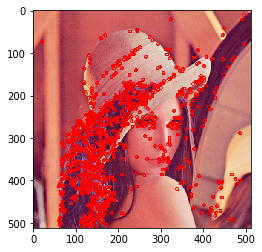

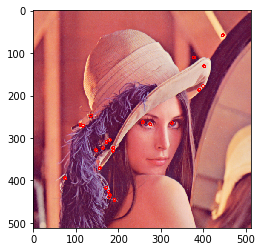

In [13]:
lena = MyImread("./lena.png")

lena_sift1 = SIFT(lena, nfeatures = 0)
lena_sift2 = SIFT(lena, nfeatures = 30)

plt.figure()
plt.imshow(lena_sift1)
plt.figure()
plt.imshow(lena_sift2)

In [9]:
#SURF
#영상(RGB)을 입력받아 특징점을 찾고,
#찾은 특징점을 그려 return하는 함수

#hessianThreshold : 헤시안 행렬 검출에 사용될 threshold
#nOctaves : 몇 개의 옥타브를 사용할지
#nOctaveLayers : 한 옥타브에서 몇개의 레이어를 사용할지

def SURF(img, hessianThreshold=400, nOctaves=4, nOctaveLayers=3):
    radian = 3 #특징점을 표시할 원의 반지름
    color = (255, 0, 0) #특징점을 표시할 색상
    thickness = 2 #원을 그리는 선의 두께 (-1이면 원 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    surf = cv2.xfeatures2d.SURF_create(hessianThreshold, nOctaves, nOctaveLayers)
    kp = surf.detect(gray_img, None)
    
    kp_xy = cv2.KeyPoint_convert(kp)
    for x,y in kp_xy :
        cv2.circle(result_img, (x,y), radian, color, thickness)
    return result_img

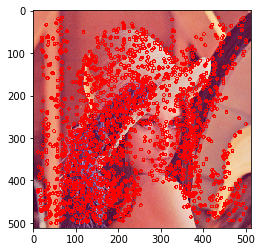

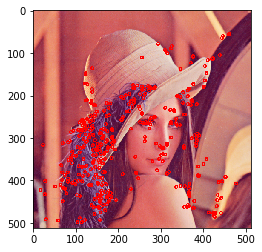

In [14]:
lena = MyImread("./lena.png")

lena_surf1 = SURF(lena, hessianThreshold = 40)
lena_surf2 = SURF(lena, hessianThreshold = 1000)

plt.figure()
plt.imshow(lena_surf1)
plt.figure()
plt.imshow(lena_surf2)

In [19]:
#FAST
#영상(RGB)을 입력받아 특징점을 찾고,
#찾은 특징점을 그려 return하는 함수

#type : 5/8, 7/12, 9/16 세가지가 존재

def FAST(img, type = cv2.FAST_FEATURE_DETECTOR_TYPE_5_8):
    radian = 3 # 특징점을 표시할 원의 반지름
    color = (255,0,0) #특징점을 표시할 색상
    thickness = 2 # 원을 그리는 선의 두께 (-1이면 원 안을 채움)
    
    h,w,c = img.shape
    result_img = img.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    surf = cv2.FastFeatureDetector_create(type=type, nonmaxSuppression=True)
    kp = surf.detect(gray_img, None)
    
    kp_xy = cv2.KeyPoint_convert(kp)
    for x,y in kp_xy :
        cv2.circle(result_img, (x,y), radian, color, thickness)
    return result_img

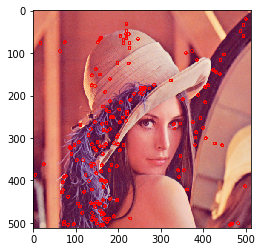

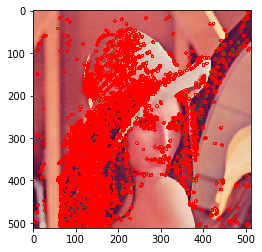

In [20]:
lena = MyImread("./lena.png")

lena_fast1 = FAST(lena, type = cv2.FAST_FEATURE_DETECTOR_TYPE_5_8)
lena_fast2 = FAST(lena, type = cv2.FAST_FEATURE_DETECTOR_TYPE_7_12)

plt.figure()
plt.imshow(lena_fast1)
plt.figure()
plt.imshow(lena_fast2)

In [21]:
#HarrisCorner와 SIFT비교
#영상 경로를 입력받아 두 함수의 실행 결과를 출력하는 함수

def Compare(path):
    img = MyImread(path)
    img_harris = Harris(img, )
    img_sift = SIFT(img, draw_rich=True)
    
    plt.figure(figsize = (12,12))
    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img)

    plt.subplot(1,3,2)
    plt.title("Harris")
    plt.imshow(img_harris)
    
    plt.subplot(1,3,3)
    plt.title("SIFT")
    plt.imshow(img_sift)

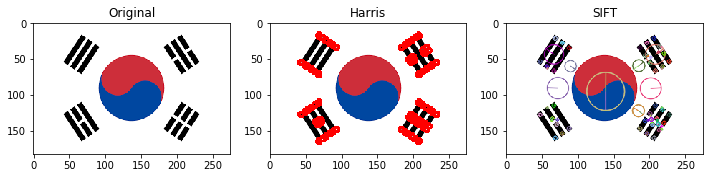

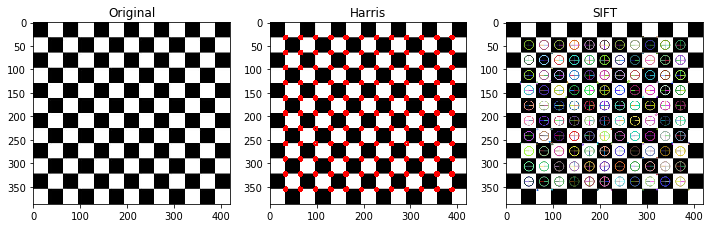

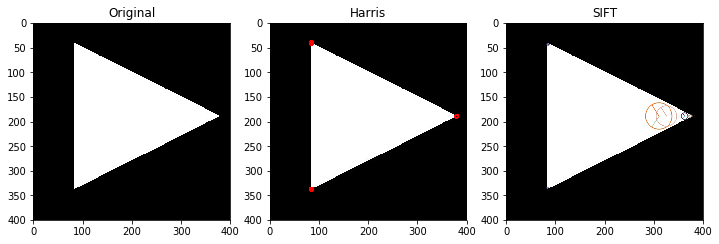

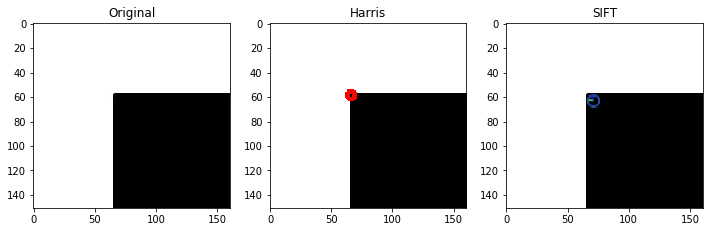

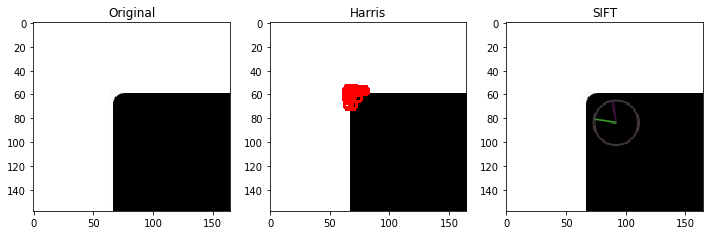

In [22]:
Compare("./korea.png")
Compare("./checkerboard.png")
Compare("./triangle.jpg")
Compare("./test1.jpg")
Compare("./test2.jpg")

In [2]:
#얼굴인식(사진)
#영상을 입력받아 face detection을 수행하고,
#얼굴 영역에 네모를 그려 return 해주는 함수

def FaceDetection(img):
    color = (255,0,0) # 얼굴 영역을 표시할 네모의 색상 지정
    thickness = 2 # 네모의 두께
    
    result_img = img.copy()
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    #이미 학습되어있는 Haar Cascade Classifier 로드
    face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    
    #얼굴 검출 수행
    faces = face_cascade.detectMultiScale(gray_img, 1.1, 5)
    
    #검출된 얼굴 영역 그리기
    for (x,y,w,h) in faces:
        cv2.rectangle(result_img, (x,y),(x+w, y+h), color, 2)
    return result_img

In [3]:
faces = MyImread("./pedestrian.jpg")

detected_faces = FaceDetection(faces)
plt.imshow(detected_faces)

NameError: name 'MyImread' is not defined

In [ ]:
#얼굴인식 (동영상)

import numpy as np
import cv2

cap = cv2.VideoCapture("Walking.mp4")

while(cap.isOpened()):
    ret, frame = cap.read()
    
    frame = cv2.resize(frame, (400,225))
    
    detected_faces = FaceDetection(frame)
    
    cv2.imshow("frame", frame)
    cv2.imshow("detected", detected_faces)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
#얼굴인식(캠)

import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(cap.isOpened()):
    ret, frame = cap.read()
    
    frame = cv2.resize(frame,(400,225))
    detected_faces = FaceDetection(frame)
    
    cv2.imshow("frame", frame)
    cv2.imshow("detected", detected_faces)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.detroyAllWindows()